<a href="https://colab.research.google.com/github/MariaKlein185/DS2002S25/blob/main/Copy_of_superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [ ]:
#Initializing SQLite
import sqlite3

#creating database
connection = sqlite3.connect('superhero_db.sqlite')

# Check if the connection was successful
print("Database created and connected!")

# Create a cursor object
cursor = connection.cursor()

print("Cursor created!")

# Create the heroes table
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')

print("Heroes table created!")

#Create villains table
cursor.execute('''
CREATE TABLE IF NOT EXISTS villians (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
)
''')

print("Villians table created!")

#Create battles table
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id TEXT NOT NULL,
    villian_id TEXT NOT NULL,
    outcome TEXT NOT NULL
)
''')

print("battles table created!")


Database created and connected!
Cursor created!
Heroes table created!
Villians table created!
battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [ ]:
#to make sure multiple copies of the data are not inserted
cursor.execute("DROP TABLE IF EXISTS heroes")
cursor.execute("DROP TABLE IF EXISTS villains")
cursor.execute("DROP TABLE IF EXISTS battles")
connection.commit()

#Importing data files to appropriate table
import pandas as pd

# Load data from CSV into a DataFrame
df_heroes = pd.read_csv('heroes.csv')

# Insert data from the DataFrame into the heroes table
df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the heroes table.")

# Load data from CSV into a DataFrame
df_villains = pd.read_csv('villains.csv')

# Insert data from the DataFrame into the villains table
df_villains.to_sql('villains', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the villains table.")

# Load data from CSV into a DataFrame
df_battles = pd.read_csv('battles.csv')

# Insert data from the DataFrame into the battles table
df_battles.to_sql('battles', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the battles table.")

#Verify data is succesfully inserted
cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()
print("Heroes data:")
for row in rows:
    print(row)

cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()
print("villains data:")
for row in rows:
    print(row)

cursor.execute("SELECT * FROM battles")
rows = cursor.fetchall()
print("battles data:")
for row in rows:
    print(row)

Data from CSV has been inserted into the heroes table.
Data from CSV has been inserted into the villains table.
Data from CSV has been inserted into the battles table.
Heroes data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')
villains data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume 

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [ ]:
#1 Retrieve all superheroes and their powers
cursor.execute("SELECT name,power FROM heroes")
rows = cursor.fetchall()

print("superheroes and their powers:")
for row in rows:
    print(row)

#2 Find all battles where the hero won
cursor.execute("SELECT * FROM battles WHERE outcome = 'Hero Wins'")
hero_wins = cursor.fetchall()

print("Battles Hero Won:")
for row in hero_wins:
   print(row)

#3 List all villains and their evil plans
cursor.execute("SELECT name,evil_plan FROM villains")
rows = cursor.fetchall()

print("villains and their evil plans:")
for row in rows:
    print(row)

#4 Determine which superhero has fought the most battles
cursor.execute('''
SELECT name,COUNT(hero_id) as battlecount FROM heroes
LEFT JOIN battles on heroes.id=battles.hero_id
GROUP BY hero_id
ORDER BY battlecount DESC
''')
superhero = cursor.fetchone()[0]

print(f"Superhero who fought most battles: {superhero}")

superheroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')
Battles Hero Won:
(2, 9, 3, 'Hero Wins')
(5, 1, 7, 'Hero Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(13, 8, 9, 'Hero Wins')
(20, 3, 4, 'Hero Wins')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')
villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')
Superhero who fought most batt

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [5]:
# Establish connection and create cursor
connection = sqlite3.connect("superheroes.db")  # Change database name if needed
cursor = connection.cursor()

# 1. Design and implement an additional table related to superheroes or villains
cursor.execute("DROP TABLE IF EXISTS hero_residence")
connection.commit()

cursor.execute('''
CREATE TABLE IF NOT EXISTS hero_residence (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    city_residence TEXT NOT NULL,
    comic_residence TEXT NOT NULL
)
''')

print("hero_residence table created!")

# 2. Populate it with data
residence_data = [
    (1, 'New York City', 'Marvel'),
    (2, 'New York City', 'Marvel'),
    (3, 'Gotham City', 'DC'),
    (4, 'Metropolis', 'DC'),
    (5, 'Asgard', 'Marvel'),
    (6, 'Themyscira', 'DC'),
    (7, 'Wakanda', 'Marvel'),
    (8, 'Central City', 'DC'),
    (9, 'New York City', 'Marvel'),
    (10, 'New York City', 'Marvel')
]

cursor.executemany('''
INSERT INTO hero_residence (hero_id, city_residence, comic_residence) VALUES (?, ?, ?)
''', residence_data)
connection.commit()

print("Data inserted into the hero_residence table!")

# 3. Write a query to retrieve meaningful insights from the new table
# How many heroes are there in each city?
cursor.execute('''
SELECT city_residence, COUNT(hero_id) AS number_of_heroes
FROM hero_residence
GROUP BY city_residence
''')

rows = cursor.fetchall()

print("Hero count per city:")
for row in rows:
    print(row)

# Close connection
connection.close()

hero_residence table created!
Data inserted into the hero_residence table!
Hero count per city:
('Asgard', 1)
('Central City', 1)
('Gotham City', 1)
('Metropolis', 1)
('New York City', 4)
('Themyscira', 1)
('Wakanda', 1)


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

hero_battles table created!
Data inserted into hero_battles table!


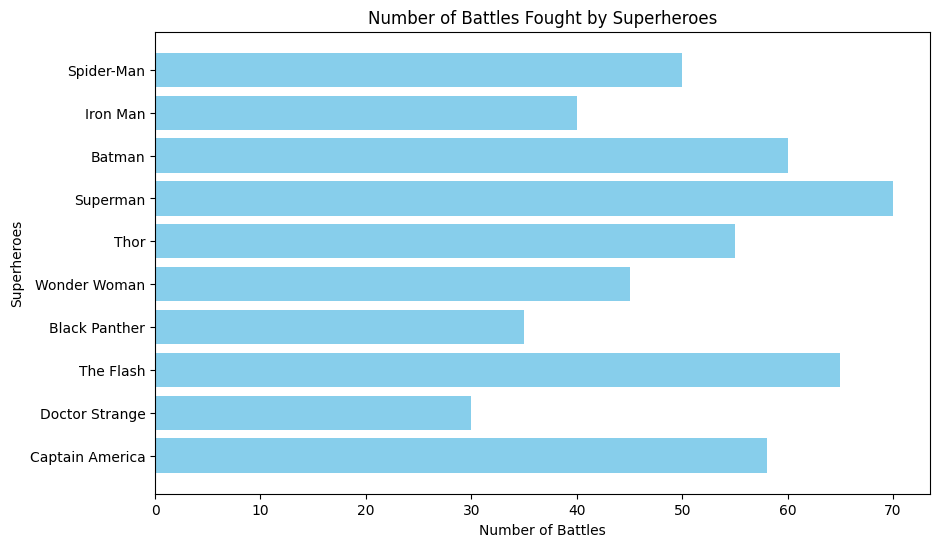

In [6]:
# Establish connection and create cursor
connection = sqlite3.connect("superheroes.db")
cursor = connection.cursor()

# Create a new table for superhero battles
cursor.execute("DROP TABLE IF EXISTS hero_battles")
connection.commit()

cursor.execute('''
CREATE TABLE IF NOT EXISTS hero_battles (
    hero_id INTEGER PRIMARY KEY,
    hero_name TEXT NOT NULL,
    battles_fought INTEGER NOT NULL
)
''')

print("hero_battles table created!")

# Populate it with sample data
battle_data = [
    (1, 'Spider-Man', 50),
    (2, 'Iron Man', 40),
    (3, 'Batman', 60),
    (4, 'Superman', 70),
    (5, 'Thor', 55),
    (6, 'Wonder Woman', 45),
    (7, 'Black Panther', 35),
    (8, 'The Flash', 65),
    (9, 'Doctor Strange', 30),
    (10, 'Captain America', 58)
]

cursor.executemany('''
INSERT INTO hero_battles (hero_id, hero_name, battles_fought) VALUES (?, ?, ?)
''', battle_data)
connection.commit()

print("Data inserted into hero_battles table!")

# Retrieve data for visualization
cursor.execute('''
SELECT hero_name, battles_fought FROM hero_battles
''')

data = cursor.fetchall()

# Close database connection
connection.close()

# Extract names and battle counts for plotting
heroes, battles = zip(*data)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(heroes, battles, color='skyblue')
plt.xlabel("Number of Battles")
plt.ylabel("Superheroes")
plt.title("Number of Battles Fought by Superheroes")
plt.gca().invert_yaxis()  # Flip the order to have the most battles at the top
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!